### This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM), to predict the closing stock price using the past 60 days stock price.

### Import Library

In [30]:
import math
import pandas_datareader as web
import numpy
import pandas
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as pyplot
import datetime
import yfinance as yahoo_finance

pyplot.style.use('fivethirtyeight')

### Get the stock quote

In [48]:
# Get the stock quote
startDate = datetime.datetime(2012,1,1)
endDate = datetime.datetime(2023,1,27)
df = yahoo_finance.download(['ARVL'], start=startDate, end=endDate)

# Show the data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-02-03 00:00:00-05:00,9.950,9.950,9.950,9.950,9.950,110000
2020-02-04 00:00:00-05:00,9.940,9.940,9.930,9.940,9.940,161000
2020-02-05 00:00:00-05:00,9.940,9.940,9.940,9.940,9.940,39100
2020-02-06 00:00:00-05:00,9.940,9.950,9.940,9.940,9.940,165400
2020-02-07 00:00:00-05:00,9.940,9.940,9.920,9.920,9.920,100500
...,...,...,...,...,...,...
2023-01-20 00:00:00-05:00,0.466,0.498,0.400,0.460,0.460,18473600
2023-01-23 00:00:00-05:00,0.445,0.480,0.410,0.432,0.432,14406200
2023-01-24 00:00:00-05:00,0.420,0.459,0.410,0.420,0.420,7908400


In [49]:
# Get the number of rows & columns in the data set
df.shape

(752, 6)

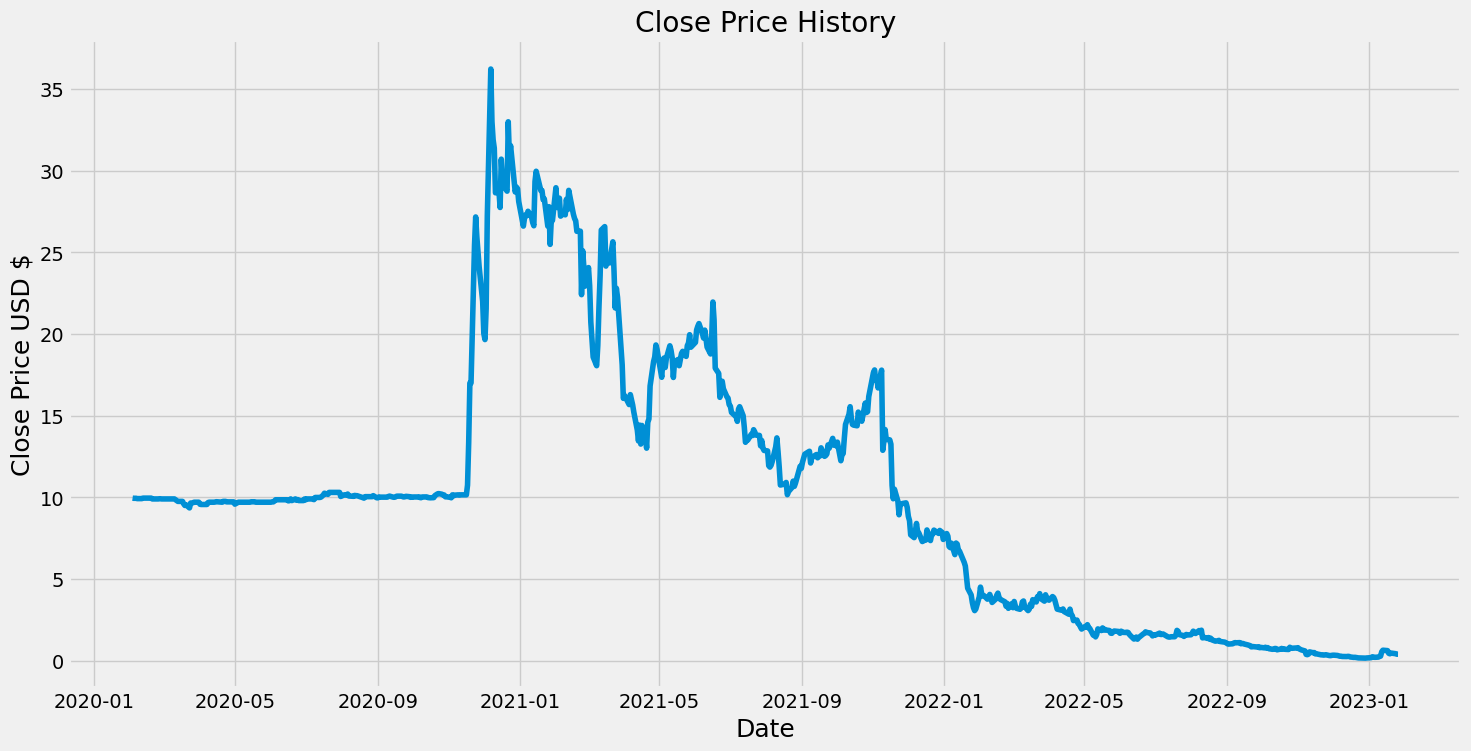

In [50]:
# Visualize the closing price
pyplot.figure(figsize=(16,8))
pyplot.title("Close Price History")
pyplot.plot(df["Close"])
pyplot.xlabel("Date", fontsize=18)
pyplot.ylabel("Close Price USD $", fontsize=18)
pyplot.show()

In [52]:
# Create a new dataframe with only the 'Close' column
ARVL_Close = df.filter(['Close'])

# Convert dataframe to a numpy array
dataset = ARVL_Close.values

# Get the number of rows to train model on
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

602

In [54]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[2.71618623e-01],
       [2.71341455e-01],
       [2.71341455e-01],
       [2.71341455e-01],
       [2.70787145e-01],
       [2.70787145e-01],
       [2.70787145e-01],
       [2.71618623e-01],
       [2.71618623e-01],
       [2.71618623e-01],
       [2.71618623e-01],
       [2.71618623e-01],
       [2.70232809e-01],
       [2.70232809e-01],
       [2.70232809e-01],
       [2.70232809e-01],
       [2.70509977e-01],
       [2.70509977e-01],
       [2.70232809e-01],
       [2.70232809e-01],
       [2.70232809e-01],
       [2.70232809e-01],
       [2.70232809e-01],
       [2.70232809e-01],
       [2.70232809e-01],
       [2.70232809e-01],
       [2.68847021e-01],
       [2.67461206e-01],
       [2.66075391e-01],
       [2.66075391e-01],
       [2.66075391e-01],
       [2.61917974e-01],
       [2.59146345e-01],
       [2.60199563e-01],
       [2.54988927e-01],
       [2.63303762e-01],
       [2.63303762e-01],
       [2.63858098e-01],
       [2.64689577e-01],
       [2.64689577e-01],


In [60]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    
    # if i <= 60:
    if i <= 61:
        print("x_train", x_train)
        print("y_train", y_train)
        print()

x_train [array([0.27161862, 0.27134146, 0.27134146, 0.27134146, 0.27078715,
       0.27078715, 0.27078715, 0.27161862, 0.27161862, 0.27161862,
       0.27161862, 0.27161862, 0.27023281, 0.27023281, 0.27023281,
       0.27023281, 0.27050998, 0.27050998, 0.27023281, 0.27023281,
       0.27023281, 0.27023281, 0.27023281, 0.27023281, 0.27023281,
       0.27023281, 0.26884702, 0.26746121, 0.26607539, 0.26607539,
       0.26607539, 0.26191797, 0.25914634, 0.26019956, 0.25498893,
       0.26330376, 0.26330376, 0.2638581 , 0.26468958, 0.26468958,
       0.26468958, 0.26122505, 0.26080933, 0.26080933, 0.26080933,
       0.26080933, 0.26413527, 0.26468958, 0.26468958, 0.26496674,
       0.26552105, 0.2653825 , 0.2653825 , 0.26468958, 0.26607539,
       0.26607539, 0.26607539, 0.26524391, 0.26524391, 0.26524391])]
y_train [0.26524391308393425]

x_train [array([0.27161862, 0.27134146, 0.27134146, 0.27134146, 0.27078715,
       0.27078715, 0.27078715, 0.27161862, 0.27161862, 0.27161862,
       0.27

In [61]:
# convert the x_train and y_train to numpy arrays
x_train, y_train = numpy.array(x_train), numpy.array(y_train)

In [67]:
# Reshape the data into 3 columns
x_train = numpy.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(542, 60, 1)

In [69]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [70]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [71]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

542/542 [==============================] - 15s 21ms/step - loss: 0.0055


In [83]:
# Create the testing data set
# Create a new array containing scaled values from 542 to 602
test_data = scaled_data[training_data_len - 60:,:]
test_data

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test

[array([0.09672949, 0.10753881, 0.1017184 , 0.09922395, 0.09839246,
        0.10449003, 0.10282705, 0.0981153 , 0.09063193, 0.08314856,
        0.08176275, 0.08120842, 0.08342572, 0.07899113, 0.07455654,
        0.08314856, 0.07427938, 0.07206209, 0.06374723, 0.06457872,
        0.05875831, 0.05737251, 0.05293791, 0.04933481, 0.0537694 ,
        0.05293791, 0.05681818, 0.05127495, 0.05044346, 0.03907982,
        0.04129712, 0.03603104, 0.04018847, 0.04961198, 0.04684036,
        0.05127495, 0.047949  , 0.04878049, 0.04767184, 0.04684036,
        0.04240576, 0.0421286 , 0.0443459 , 0.04600887, 0.04517738,
        0.0421286 , 0.04573171, 0.04379158, 0.04351441, 0.04406874,
        0.04351441, 0.04046563, 0.03824834, 0.03242794, 0.03353659,
        0.03575388, 0.03215077, 0.03464523, 0.04101996, 0.0421286 ]),
 array([0.10753881, 0.1017184 , 0.09922395, 0.09839246, 0.10449003,
        0.10282705, 0.0981153 , 0.09063193, 0.08314856, 0.08176275,
        0.08120842, 0.08342572, 0.07899113, 0.

In [76]:
# Convert the data to numpy array
x_test = numpy.array(x_test)
x_test

array([], dtype=float64)

In [75]:
# Reshape the data
x_test = numpy.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

IndexError: tuple index out of range